<h1 style="font-size:180%; color:blue;"><i><b>OpenFood. EDA: Correlation analysis </b></i></h1>

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
#Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import os

import scipy.stats as stats
import matplotlib.pyplot as plt
import random

%matplotlib inline

#### Absolute and Relative paths

In [2]:
dirname = os.path.dirname('../input/openfood/')
filename = os.path.join(dirname, 'data_385k.pkl')

In [3]:
filename

'../input/openfood/data_385k.pkl'

### Import the data as a pandas DataFrame into your notebook.

Load it using the pandas read_pickle function and set the compression parameter to ‘zip’

Display a few entries.

In [4]:
df = pd.read_pickle('../input/openfood/data_385k.pkl', compression='zip')
df.head()

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Create lists with suffix 

Re-creating the list made on Task A

In [5]:
#Answered by Paulo Junqueira https://www.kaggle.com/discussions/questions-and-answers/529311#2965039
#I've just changed the suffixes and columns names

# List of suffixs to be search for
suffixes = ['per_hundred', 'per_portion', 'unit']

# Create a dictionary to store lists of columns for each suffix
columns_by_suffix = {suffix: [col for col in df.columns if col.endswith(suffix)] for suffix in suffixes}

# add element without sufix
columns_by_suffix['other_cols'] = [col for col in df.columns if not any(col.endswith(suffix) for suffix in suffixes)]

# Printing sufix dict
for suffix, columns in columns_by_suffix.items():
    print(f"Columns with suffix '{suffix}': {columns}")


per_portion = df[columns_by_suffix['per_portion']]
per_hundred = df[columns_by_suffix['per_hundred']]
unit = df[columns_by_suffix['unit']]

other_cols = df[columns_by_suffix['other_cols']]

Columns with suffix 'per_hundred': ['calcium_per_hundred', 'carbohydrates_per_hundred', 'cholesterol_per_hundred', 'copper_cu_per_hundred', 'energy_kcal_per_hundred', 'energy_per_hundred', 'fat_per_hundred', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred', 'fiber_insoluble_per_hundred', 'fiber_per_hundred', 'fiber_soluble_per_hundred', 'folate_total_per_hundred', 'folic_acid_per_hundred', 'iron_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'phosphorus_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 'potassium_k_per_hundred', 'protein_per_hundred', 'salt_per_hundred', 'saturated_fat_per_hundred', 'sodium_per_hundred', 'sugars_added_per_hundred', 'sugars_per_hundred', 'vitamin_a_iu_per_hundred', 'vitamin_b12_cobalamin_per_hundred', 'vitamin_b1_thiamin_per_hundred', 'vitamin_b2_riboflavin_per_hundred', 'vitamin_b3_niacin_per_hundred', 'vitamin_b5_panthothenic_acid_per_hundred', 'vitam

### Columns with suffix per_hundred

In [6]:
per_hundred = df[columns_by_suffix['per_hundred']]

per_hundred.head(2)

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,...,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
0,NaN,75.0,NaN,NaN,359.0,1500.0,0.42,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.5,NaN,NaN,242.0,1010.0,18.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####  Correlation between two columns using the corr function from pandas

In [7]:
#Get the correlation between the two columns X and Y using the corr function from pandas

per_hundred["energy_per_hundred"].corr(per_hundred["fat_per_hundred"])

0.7241494526041449

### Pandas correlation one column vs all: Use corrwith() method 

Use **corrwith() method** to quantify the correlation between (single) column energy_per_hundred and the rest of the per_hundred columns (numerical columns of the dataframe)

In [8]:
#https://stackoverflow.com/questions/70479605/python-pandas-pandas-correlation-one-column-vs-all
#pandas correlation one column vs all

per_hundred.corrwith(per_hundred['energy_per_hundred'])

calcium_per_hundred                                0.025378
carbohydrates_per_hundred                          0.687094
cholesterol_per_hundred                            0.012668
copper_cu_per_hundred                             -0.003648
energy_kcal_per_hundred                            0.998183
energy_per_hundred                                 1.000000
fat_per_hundred                                    0.724149
fatty_acids_total_saturated_per_hundred            0.531265
fatty_acids_total_trans_per_hundred                0.013893
fiber_insoluble_per_hundred                        0.102180
fiber_per_hundred                                  0.271281
fiber_soluble_per_hundred                          0.143617
folate_total_per_hundred                           0.034626
folic_acid_per_hundred                             0.012160
iron_per_hundred                                   0.002839
magnesium_per_hundred                              0.013244
manganese_mn_per_hundred                

## F1. Quantify relationship between energy_per_hundred and the per_hundred columns

"Your task is to **quantify** the linear relationships between the energy_per_hundred and the per_hundred columns by analysing their correlation with each other."

I applied sort_values since we're going to know the Most and the Least correlated with energy _per_hundred

In [9]:
#Apply corrwith() method to get the relationship of one single column and ALL the others
#apply sort_values() to get the most (higher values) and least correlated

quantify= per_hundred.corrwith(per_hundred['energy_per_hundred'])

quantify.sort_values(ascending=False)

energy_per_hundred                                 1.000000
energy_kcal_per_hundred                            0.998183
fat_per_hundred                                    0.724149
carbohydrates_per_hundred                          0.687094
monounsaturated_fatty_acids_per_hundred            0.656770
saturated_fat_per_hundred                          0.643397
sugars_per_hundred                                 0.593679
polyunsaturated_fatty_acids_per_hundred            0.581956
fatty_acids_total_saturated_per_hundred            0.531265
sugars_added_per_hundred                           0.467512
manganese_mn_per_hundred                           0.307965
protein_per_hundred                                0.296348
fiber_per_hundred                                  0.271281
fiber_soluble_per_hundred                          0.143617
fiber_insoluble_per_hundred                        0.102180
vitamin_d_d2_d3_international_units_per_hundred    0.040977
folate_total_per_hundred                

### Observations

"If there is a perfect linear relationship then we will always have a correlation coefficient of 
1 or −1."

energy_per_hundred has ALMOST a **perfect linear** relationship with **energy_kcal_per_hundred** and obviously a PERFECT with itself. Increasing X also increase Y by the same factor. Directly proportional to the increase.

"It follows directly that two independent variables will always have a correlation of zero."


"Negative means: An increase in X results in a decrease in Y of the same factor."

**Negative relationship**:

sodium_per_hundred                                -0.002965

copper_cu_per_hundred                             -0.003648

vitamin_b3_niacin_per_hundred                     -0.004705

vitamin_b12_cobalamin_per_hundred                 -0.007610

vitamin_c_ascorbic_acid_per_hundred               -0.010533

vitamin_b5_panthothenic_acid_per_hundred          -0.010763

vitamin_a_iu_per_hundred                          -0.013668

salt_per_hundred                                  -0.029597


**Positive relationship**: 

All the other variables(nutrients), despite many have a weak (very small coefficients) relationship. 

In [10]:
#Save for the next time

#per_hundred["energy_per_hundred"].corr(per_hundred["fat_per_hundred"])

#Just to check a single (one-to-one column) correlation

#np.corrcoef(per_hundred['energy_per_hundred'], per_hundred['zinc_per_hundred'])

## F2  Visualizations: Most and Least Correlated Nutrients with energy_per_hundred

"Your task is to reveal the true nature of the relationship, linear or non-linear, between variables, using visualizations. Based on the correlation coefficients you found in the previous task, pick the **three most correlated** and the **three least** correlated **nutrients** (in **absolute terms**) with the energy_per_hundred column. Plot them against the energy_per_hundred column, using scatterplots. You should obtain these plots as subplots (with 2 rows and 3 columns) or as seaborn pairplots."

### According to the task F1, these are my findings (results in **absolute terms**). 

**MOST CORRELATED** nutrients: 

fat_per_hundred                                    0.724149

carbohydrates_per_hundred                         0.687094

monounsaturated_fatty_acids_per_hundred           0.656770


**LEAST CORRELATED** nutrients: 

vitamin_b5_panthothenic_acid_per_hundred          -0.010763

vitamin_a_iu_per_hundred                          -0.013668

salt_per_hundred                                  -0.029597


Though these last are NEGATIVE, the task mentioned **Absolute terms**. 

#### Try a pairplot

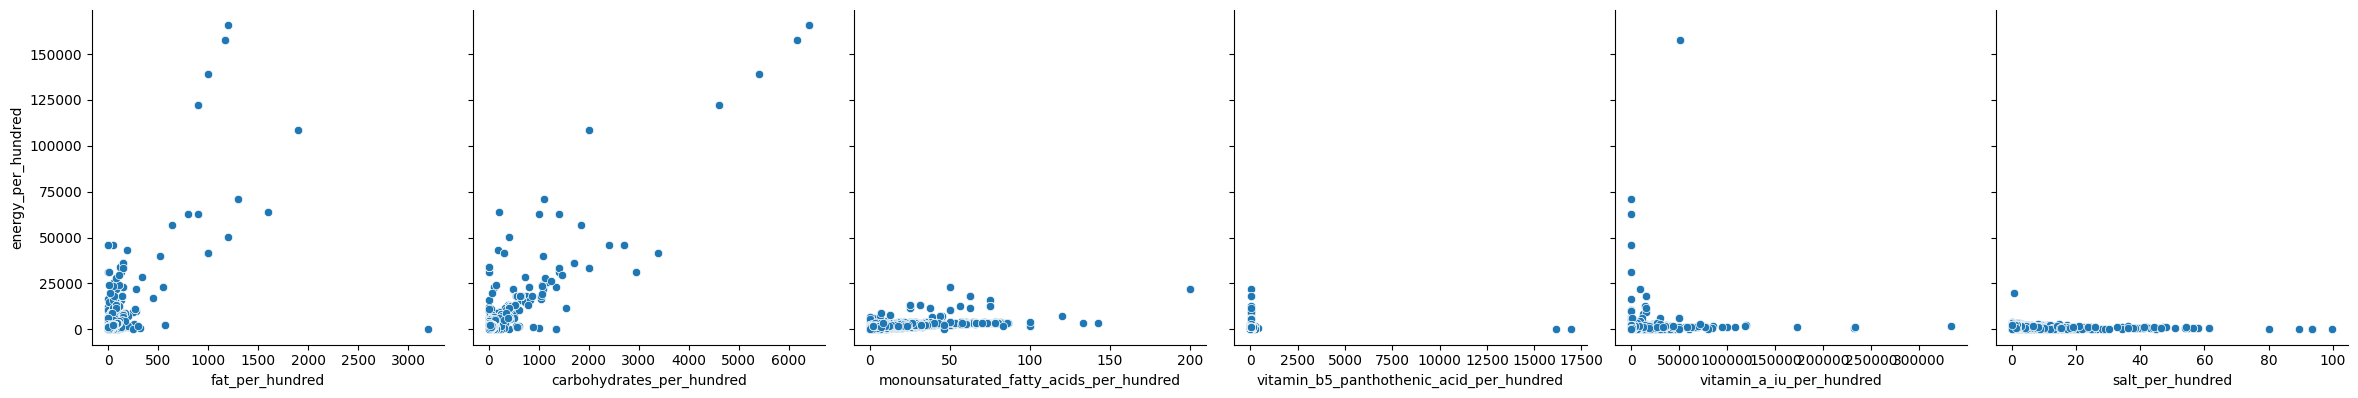

In [11]:
#Relation between the energy_per_hundred and the most/least correlated features

#plt.figure(figsize=(40,40)) #Didn't help and included a line between snippet/chart

sns.pairplot(per_hundred, x_vars=["fat_per_hundred", "carbohydrates_per_hundred", "monounsaturated_fatty_acids_per_hundred", "vitamin_b5_panthothenic_acid_per_hundred", "vitamin_a_iu_per_hundred", "salt_per_hundred"], 
                   y_vars=["energy_per_hundred"], 
                   #hue="Elevation", 
                   height=4)# height 3 overlapped the x-axis.

plt.show()

#### Since the size are so small, try Seaborn FacetGrid and col_wrap

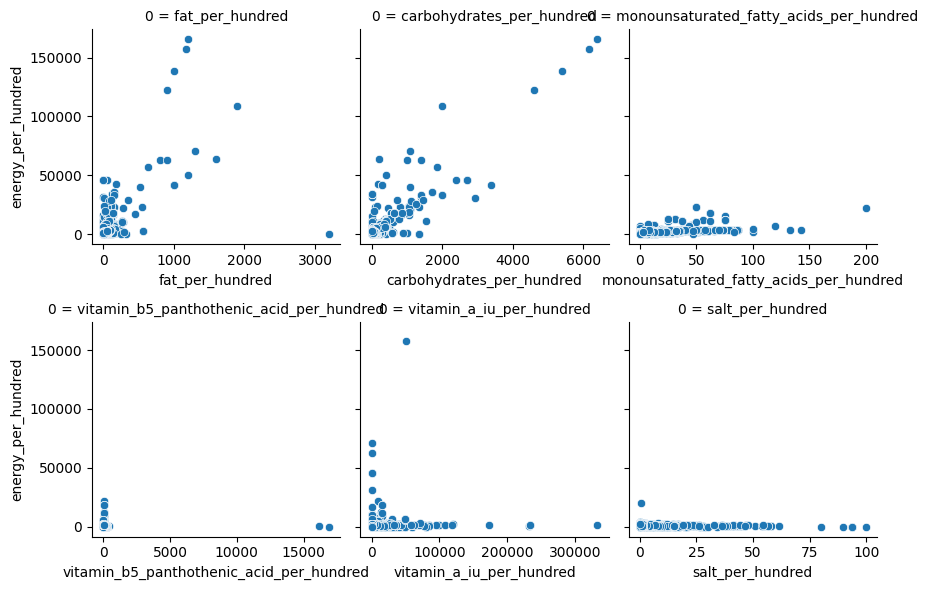

In [12]:
#https://github.com/mwaskom/seaborn/issues/2121 SIMPLE WAY
# https://stackoverflow.com/questions/68506546/how-to-draw-a-figure-by-seaborn-pairplot-in-several-rows

x_vars = ["fat_per_hundred", "carbohydrates_per_hundred", "monounsaturated_fatty_acids_per_hundred", "vitamin_b5_panthothenic_acid_per_hundred", "vitamin_a_iu_per_hundred", "salt_per_hundred"]
y_var = "energy_per_hundred"

g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=3, sharex=False)
for ax, x_var in zip(g.axes, x_vars):
    sns.scatterplot(data=per_hundred, x=x_var, y=y_var, ax=ax)
g.tight_layout();

#### Observations on the subplots above  

axis[0]  (i.e. with only one number in the brackets) will return error

To fix it: write [0][1] -> 1st row, 2nd column and so on.

To avoid AttributeError: 'numpy.ndarray' object has no attribute 'xaxis' [duplicate]

"If you debug your program by simply printing ax, you'll quickly find out that ax is a two-dimensional array: one dimension for the rows, one for the columns."

"You will get a numpy ndarray object which is actually a 2D array which can be traversed only using 2 indices i.e. axis[0, 0], axis[1, 0]...and so on

"Notice that the bar plot of wines by point counts is in the first row and first column (the [0][0] position), while the bar plot of wines by origin is in the second row and second column ([1][1])."

"By combining subplots with the styles we learned in the last section, we can create appealing-looking panel displays."

https://www.kaggle.com/code/residentmario/subplots

#### Same visualizations with Seaborn subplots

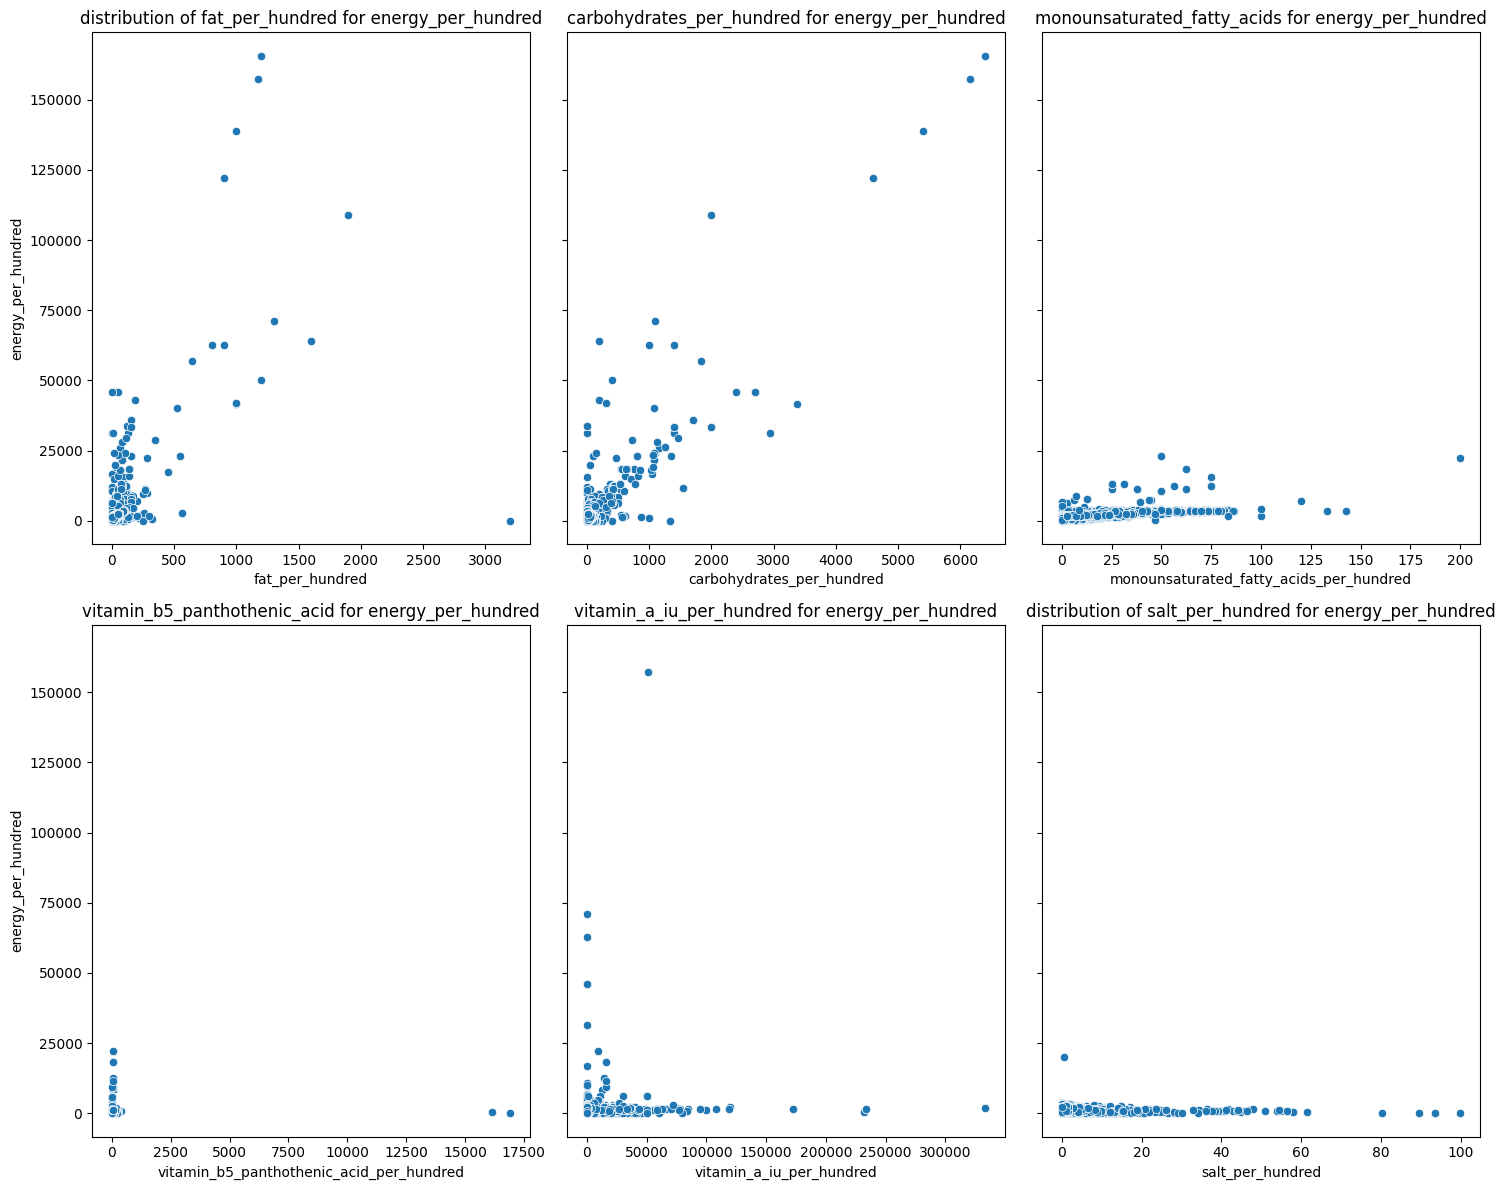

In [13]:
#https://www.kaggle.com/code/residentmario/subplots

#Adapted from Daniel Flores Agreda since I delivered a single violin instead of subplots on course1

fig, axes = plt.subplots(nrows = 2,
                         ncols = 3,
                         figsize = (15, 12), sharey=True) 


sns.scatterplot(x="fat_per_hundred", y="energy_per_hundred", data=per_hundred, ax=axes[0][0])
sns.scatterplot(x="carbohydrates_per_hundred", y="energy_per_hundred", data=per_hundred, ax=axes[0][1])
sns.scatterplot(x="monounsaturated_fatty_acids_per_hundred", y="energy_per_hundred", data=per_hundred, ax=axes[0][2])
sns.scatterplot(x="vitamin_b5_panthothenic_acid_per_hundred", y="energy_per_hundred", data=per_hundred, ax=axes[1][0])
sns.scatterplot(x="vitamin_a_iu_per_hundred", y="energy_per_hundred", data=per_hundred, ax=axes[1][1])
sns.scatterplot(x="salt_per_hundred", y="energy_per_hundred", data=per_hundred, ax=axes[1][2])


#Distributions of the Most and the Least Correlated (All columns per_hundred suffix)
#Correlated to energy_per_hundred

axes[0][0].set_title('distribution of fat_per_hundred for energy_per_hundred')
axes[0][1].set_title('carbohydrates_per_hundred for energy_per_hundred')
axes[0][2].set_title('monounsaturated_fatty_acids for energy_per_hundred')
axes[1][0].set_title('vitamin_b5_panthothenic_acid for energy_per_hundred')
axes[1][1].set_title('vitamin_a_iu_per_hundred for energy_per_hundred')
axes[1][2].set_title('distribution of salt_per_hundred for energy_per_hundred')


fig.tight_layout()
plt.show()

### Linear or Non_linear

"Correlation **only captures linear relationships***, but variables can be related in non-linear ways as well." (course2, subject Statistical data analysis/unit 08: covariance and correlation.

"Two variables will have linear relation if by plotting on a graph pair of points, a straight line will appear."

**Observations of the Distributions above.**

We notice linear relationship in fat_per_hundred and carbohydrates_per_hundred (two charts left/center on the first row.)

On the other four features, including one of the most correlated (monounsaturated_fatty_acids_per_hundred) we don't see a clear line (linear relationship) 

### Are there still extreme values that, once removed, relationships would change?

Let's try to remove the outliers (Task C), but now with the features we applied on this Correlation task.

In [14]:
#Most and Least correlated features (nutrients)

feature_cols = ["fat_per_hundred", "carbohydrates_per_hundred", "monounsaturated_fatty_acids_per_hundred", "vitamin_b5_panthothenic_acid_per_hundred", "vitamin_a_iu_per_hundred", "salt_per_hundred"]

### Function to make Outliers list

In [15]:
#By Junji Takeshima https://www.kaggle.com/code/junjitakeshima/ubiquant-simple-lgbm-removing-outliers-en-jp

outlier_list = []
outlier_col = []

for col in feature_cols:
    
    temp_df = per_hundred[(per_hundred[col] > per_hundred[col].mean() + per_hundred[col].std() * 70) |
                       (per_hundred[col] < per_hundred[col].mean() - per_hundred[col].std() * 70) ]
    temp2_df = per_hundred[(per_hundred[col] > per_hundred[col].mean() + per_hundred[col].std() * 35) |
                        (per_hundred[col] < per_hundred[col].mean() - per_hundred[col].std() * 35) ]
    if len(temp_df) >0 : 
        outliers = temp_df.index.to_list()
        outlier_list.extend(outliers)
        outlier_col.append(col)
        print(col, len(temp_df))
    elif len(temp2_df)>0 and len(temp2_df) <6 :
        outliers = temp2_df.index.to_list()
        outlier_list.extend(outliers)
        outlier_col.append(col)
        print(col, len(temp2_df))

outlier_list = list(set(outlier_list))
print(len(outlier_col), len(outlier_list))

fat_per_hundred 3
carbohydrates_per_hundred 6
vitamin_b5_panthothenic_acid_per_hundred 2
vitamin_a_iu_per_hundred 5
4 16


#### Remove/drop outliers

In [16]:
#Remove Outliers

per_hundred.drop(per_hundred.index[outlier_list], inplace = True)
#df1

### Plot the same initial Pairplot after dropping outliers.

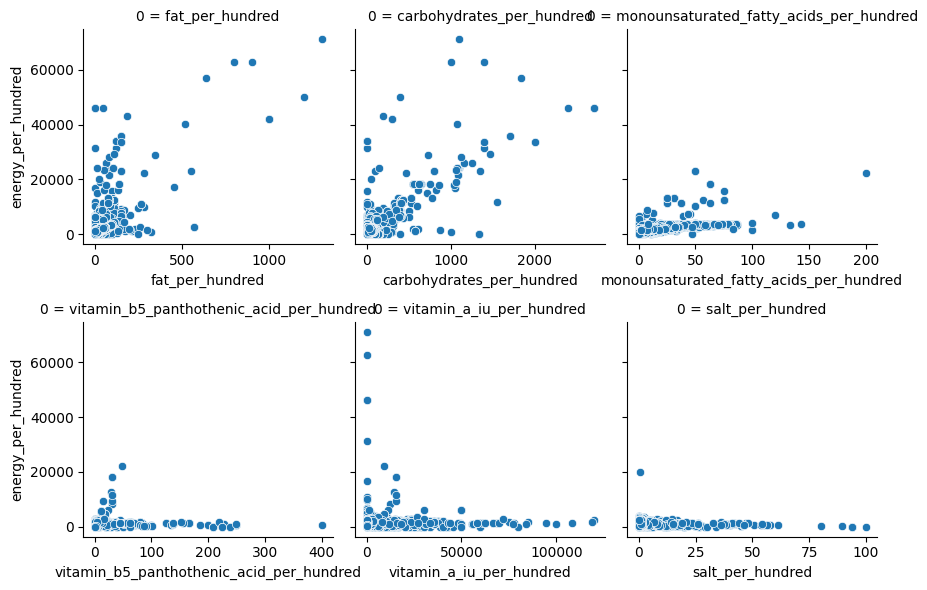

In [17]:
#https://github.com/mwaskom/seaborn/issues/2121 SIMPLE WAY
# https://stackoverflow.com/questions/68506546/how-to-draw-a-figure-by-seaborn-pairplot-in-several-rows

x_vars = ["fat_per_hundred", "carbohydrates_per_hundred", "monounsaturated_fatty_acids_per_hundred", "vitamin_b5_panthothenic_acid_per_hundred", "vitamin_a_iu_per_hundred", "salt_per_hundred"]
y_var = "energy_per_hundred"

g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=3, sharex=False)
for ax, x_var in zip(g.axes, x_vars):
    sns.scatterplot(data=per_hundred, x=x_var, y=y_var, ax=ax)
g.tight_layout();

### Observations after removing extreme values

It seems that the values are more spread in all charts. (As we've already seen on Task C). And we get an **increase of the correlation** by comparing at the beginning when the output corr() for the fat_per_hundred column was 0.7241494526041449 (input 9). And below, it returned 0.7536290727968885.

In [18]:
#Get the correlation between the two columns X and Y using the corr function from pandas

per_hundred["energy_per_hundred"].corr(per_hundred["fat_per_hundred"])

0.7536290727968885

## F3. Independence of two categorical variable statistically.

"Your task is to test the independence of two categorical variables statistically. Use the energy_per_hundred column to **create a new variable** that holds **equal proportion of values** in three categories low energy, medium energy and high energy. Test if the level of energy in the product is associated with the country where the product is produced."

### Categorize one column with pd.cut and apply methods

"Use the energy_per_hundred column to **create a new variable** that holds **equal proportion of values** in three categories low energy, medium energy and high energy."

In [19]:
df['new']=pd.qcut(df['energy_per_hundred'], q=[0, 0.25, 0.75, 1.0], labels=['low', 'medium', 'high'])

In [20]:
df['new'].value_counts()

new
medium    174022
low        85983
high       81816
Name: count, dtype: int64

In [21]:
df['country'].value_counts()

country
US    328289
CH     43617
DE     10639
IT      2719
FR       118
AT         1
UK         1
Name: count, dtype: int64

In [22]:
#Categorize one column with pd.cut, quantiles and apply methods
#Attention with quantiles so it's pd.qcut() Quantile-based discretization function

new= pd.qcut(df['energy_per_hundred'], q=[0, 0.25, 0.75, 1.0], labels=['low', 'medium', 'high'])
new.tail()

385379       NaN
385380    medium
385381      high
385382       NaN
385383       NaN
Name: energy_per_hundred, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

### The Chi-square test of independence

"In the Chi-square test of independence the objective is to test whether two **categorical variables are independent or not**. Let’s set up an example of a population with two categorical variables and **test the null hypothesis** that they are **independent**. Suppose that the following data shows seven countries (US, CH, DE, IT, FR, AT, UK) that are products associated to three levels of energy (low, medium, high)"

https://learn.extensionschool.ch/learn/programs/applied-data-science-machine-learning-v3/subjects/statistical-data-analysis-v4/units/hypothesis-testing-v4

In [23]:
#New variable holds proportion of values in three categories low energy, medium energy and high energy

data = pd.DataFrame(
    ["medium"] * 174022 + ["high"] * 81816 + ["low"] * 85983, 
    columns=['new']
)
data['country'] = data.groupby('new')['new'].transform(lambda x: np.random.choice(['US','CH','DE','IT','FR','AT','UK'], size=len(x)))
data 

,new,country
0,medium,AT
1,medium,US
2,medium,UK
3,medium,CH
4,medium,UK
...,...,...
341816,low,FR
341817,low,IT
341818,low,US
341819,low,US


### Summarize data in a (contingency) table.

In [24]:
pd.crosstab(data.new, data.country, margins=True)

country,AT,CH,DE,FR,IT,UK,US,All
new,,,,,,,,
high,11658,11662,11616,11959,11709,11680,11532,81816
low,12165,12495,12210,12419,12228,12342,12124,85983
medium,24789,24978,24857,25027,24695,24793,24883,174022
All,48612,49135,48683,49405,48632,48815,48539,341821


### Access a small random sample through a contingency table

"Access to this population only via a small sample from it. We are interested to know whether the countries and the proportion of energy producted by their Food are associated/related to each other or not. Let’s begin the test by taking random sample of 1000 and represent them through a contingency table."

In [25]:
sample = data.sample(n=1000)

pd.crosstab(sample.new, sample.country, margins=True)

country,AT,CH,DE,FR,IT,UK,US,All
new,,,,,,,,
high,34,28,32,36,31,38,29,228
low,53,46,42,35,27,30,30,263
medium,59,77,68,89,65,92,59,509
All,146,151,142,160,123,160,118,1000


"Note that the minimum value in the new-country combination is 27 (low, IT), which is large enough for the Chi-square test to give us valid results. In case we observe a new-countrie combination with less than 5 entries we should remove the respective category from the sample."

https://learn.extensionschool.ch/learn/programs/applied-data-science-machine-learning-v3/subjects/statistical-data-analysis-v4/units/hypothesis-testing-v4

### Chi2_contingency function. Obtain test stastistic and probability value. 

"Lastly, we can use the chi2_contingency function from scipy to obtain the test statistic and probability value."

In [26]:
#Use the chi2_contingency function to obtain the test statistic and probability value.

chi_square, p_value, dof, matrix = stats.chi2_contingency(pd.crosstab(sample.new, sample.country))

print(chi_square,p_value)

20.060928893131596 0.0659421355990704


### Countries and Energy categories are independent from each other

p-value= 0.0659421355990704

"A significance level of 0.05 was chosen, which is common for this type of test."

"Since the **p-value is greater than the significance level** 0.05, we don’t reject the null hypothesis. This indicates that the countries and energy proportions are independent from each other. This is no surprise as we randomly assigned the energy categories to the countries when we constructed the population in this example."

https://learn.extensionschool.ch/learn/programs/applied-data-science-machine-learning-v3/subjects/statistical-data-analysis-v4/units/hypothesis-testing-v4

## H0 was Not rejected

Outcome:

H0 wasn't rejected because of insufficient evidence to support H1. 

Besides, p-value (0.0659421355990704) is greater than the significance level.

"The failure to reject H0 does not mean the null hypothesis is true. There is no formal outcome that says “accept H0.” It only means that we do not have sufficient evidence to support H1."

https://www.sci.utah.edu/~arpaiva/classes/UT_ece3530/hypothesis_testing.pdf